# taking random 110 non-obl proteins to compare with 110 obl proteins

In [1]:
import os
from prody import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re #regular expression
from scipy.stats import mannwhitneyu #mann-whitney test
from scipy.stats import kstest #ks-test

In [4]:
pdb_dir="/home/sidhant/Sidhanta/work/multidomain/noxclass_trial/noxclass_inputs/nox_input_pdbs/"
obl_file= pd.read_csv("../../obl_final",sep=',',header=None) #this contain pdbs and its uniprot
non_obl_file=pd.read_csv("../../non_obl_final",sep=',',header=None)
obl_pdbs=obl_file.iloc[:,0] #obl pdbs
#non_obl_pdbs=non_obl_file.iloc[:,0] #non-obl pdbs re-classified

data=open("/home/sidhant/Sidhanta/work/multidomain/dir.cla.scope.2.07-stable.txt")
data_lines=data.readlines()

In [5]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def find_pdb(pdb, list_name):  #function to find position of pdb in the dir.cla file using readlines and uses package 're'  
    pdb = str(pdb)
    locs=[]
    for i in range(len(list_name)):
        if (list_name[i].find(pdb,7)== -1): #find pdb after 7th position i.e. 2nd column
            continue
        else:
            locs.append(i)
    return(locs)

def dom_start(string):  #left side of boundary
    b=re.findall(r'(:)(\d+)(-)',string) #:followed by one or more integer followed by -
    return(b)
def dom_end(string): #right side of boundary
    a=re.findall(r'(-)(\d+)(\t)',string) #-followed by one or more integer followed by tab
    return(a)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [6]:
rand_nos=np.random.randint(0,154,110)#start,finish,size. finish is exclusive.so 154

non_obl_pdbs1=non_obl_file.iloc[[i for i in rand_nos],0]#contains random list of non-obl protein structur ids
print(max(rand_nos))
non_obl_pdbs1

153


65     1VLI
55     1T3S
5      1C4O
112    3DEO
50     1RQ5
       ... 
78     2BMW
27     1HNF
62     1UNF
15     1EN2
43     1NKR
Name: 0, Length: 110, dtype: object

In [7]:
#obl +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
higher_corr_per_obl=[] #list of % of residues having high correlation (> cutoff) in proteins
pdb_ids_obl=[] #list used to know the pdbs having high correlation and hence outlier
all_corr_obl=[] #stores all correlation values of proteins

for pdb in obl_pdbs:
    pdb_ids_obl.append(pdb)
        
    #finding domain boundary
    pdb_locs=find_pdb(pdb.lower(),data_lines)#gives the line numbers which contain this pdb id
    dom_locs=[]#start and end positions of domains in that pdb
    for i in pdb_locs:
        dom_locs.append(dom_start(data_lines[i])[0][1])
        dom_locs.append(dom_end(data_lines[i])[0][1])
    dom_locs=sorted([int(i) for i in dom_locs]) #sorted domain locations and converting to int.
    print(dom_locs)
    h=(dom_locs[1]-dom_locs[0])+1 #height---vertical
    w=(dom_locs[2]-dom_locs[0])+1 #width---horizontal
    print(h,w)
    
    #ANM calculation-------------------------------
    prot=parsePDB(pdb_dir+pdb+".pdb")
    #print(pdb,prot.numResidues())#no. of residues
    prot_ca=prot.select('calpha')
    anm=ANM()
    anm.buildHessian(prot_ca)
    anm.calcModes()
    cor=calcCrossCorr(anm)
    dom_corr=[cor[i][j] for i in range(h) for j in range(w,len(cor))] #top right corner of matrix
    higher_corr_per_obl.append((len([k for k in dom_corr if abs(k)>0.5])/len(dom_corr))*100) #% of residues with high correlation between dom1 and dom2
    for z in dom_corr:
        all_corr_obl.append(z)



d_obl=dict(zip(pdb_ids_obl,higher_corr_per_obl)) #dictionary which store pdb id and its % of residues highly correlated
d_obl_sort=sorted(d_obl.items(), key=lambda x: x[1], reverse=True) #sorting dict according to values


@> 1102 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Secondary structures were assigned to 67 residues.
@> Hessian was built in 0.07s.
@> 20 modes were calculated in 0.02s.


[1, 47, 48, 125]
47 48


@> 4083 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 214 residues.


[1, 247, 248, 452]
247 248


@> Hessian was built in 0.32s.
@> 20 modes were calculated in 0.16s.
@> 1928 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 138 residues.
@> Hessian was built in 0.15s.


[121, 251, 260, 375]
131 140


@> 20 modes were calculated in 0.06s.
@> 1592 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 127 residues.
@> Hessian was built in 0.10s.
@> 20 modes were calculated in 0.03s.


[1, 97, 98, 178]
97 98


@> 2192 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 180 residues.


[1, 132, 133, 288]
132 133


@> Hessian was built in 0.19s.
@> 20 modes were calculated in 0.08s.
@> 1060 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Secondary structures were assigned to 80 residues.
@> Hessian was built in 0.06s.
@> 20 modes were calculated in 0.04s.


[4, 73, 74, 133]
70 71


@> 4005 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 295 residues.


[1, 217, 218, 456]
217 218


@> Hessian was built in 0.29s.
@> 20 modes were calculated in 0.17s.
@> 1536 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 93 residues.
@> Hessian was built in 0.09s.
@> 20 modes were calculated in 0.04s.


[4, 85, 86, 174]
82 83


@> 5029 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 456 residues.


[7, 283, 284, 583]
277 278


@> Hessian was built in 0.38s.
@> 20 modes were calculated in 0.39s.
@> 1637 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 117 residues.
@> Hessian was built in 0.13s.


[27, 128, 129, 238]
102 103


@> 20 modes were calculated in 0.05s.
@> 2430 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 160 residues.


[2, 189, 190, 293]
188 189


@> Hessian was built in 0.17s.
@> 20 modes were calculated in 0.08s.
@> 2900 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 194 residues.


[7, 175, 176, 393]
169 170


@> Hessian was built in 0.24s.
@> 20 modes were calculated in 0.10s.
@> 929 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Secondary structures were assigned to 71 residues.
@> Hessian was built in 0.06s.
@> 20 modes were calculated in 0.01s.


[89, 143, 144, 190]
55 56


@> 6719 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> Secondary structures were assigned to 425 residues.


[1, 430, 431, 710]
430 431


@> Hessian was built in 0.58s.
@> 20 modes were calculated in 0.87s.
@> 4117 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 315 residues.


[18, 224, 225, 486]
207 208


@> Hessian was built in 0.35s.
@> 20 modes were calculated in 0.24s.
@> 7703 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> Secondary structures were assigned to 612 residues.


[1, 375, 376, 903]
375 376


@> Hessian was built in 0.67s.
@> 20 modes were calculated in 2.83s.
@> 3305 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 228 residues.


[2, 196, 197, 365]
195 196


@> Hessian was built in 0.25s.
@> 20 modes were calculated in 0.10s.
@> 1446 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 134 residues.
@> Hessian was built in 0.10s.
@> 20 modes were calculated in 0.03s.


[3, 67, 68, 174]
65 66


@> 2702 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 248 residues.


[1, 239, 240, 344]
239 240


@> Hessian was built in 0.22s.
@> 20 modes were calculated in 0.09s.
@> 4999 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 357 residues.


[10, 259, 260, 622]
250 251


@> Hessian was built in 0.47s.
@> 20 modes were calculated in 0.57s.
@> 2529 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 179 residues.


[430, 525, 526, 724]
96 97


@> Hessian was built in 0.16s.
@> 20 modes were calculated in 0.07s.
@> 2713 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 253 residues.


[77, 289, 290, 399]
213 214


@> Hessian was built in 0.20s.
@> 20 modes were calculated in 0.23s.
@> 2843 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 216 residues.


[1, 160, 161, 329]
160 161


@> Hessian was built in 0.23s.
@> 20 modes were calculated in 0.10s.
@> 2576 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 133 residues.


[358, 433, 434, 686]
76 77


@> Hessian was built in 0.23s.
@> 20 modes were calculated in 0.08s.
@> 2519 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 216 residues.


[236, 435, 436, 602]
200 201


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.09s.
@> 3181 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 231 residues.


[1, 164, 165, 335]
164 165


@> Hessian was built in 0.23s.
@> 20 modes were calculated in 0.12s.
@> 5291 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 308 residues.


[2, 312, 313, 611]
311 312


@> Hessian was built in 0.49s.
@> 20 modes were calculated in 0.64s.
@> 2858 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 235 residues.


[1231, 1414, 1415, 1535]
184 185


@> Hessian was built in 0.19s.
@> 20 modes were calculated in 0.12s.
@> 2801 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 212 residues.


[42, 198, 199, 380]
157 158


@> Hessian was built in 0.22s.
@> 20 modes were calculated in 0.09s.
@> 2221 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 188 residues.
@> Hessian was built in 0.14s.


[1, 125, 126, 250]
125 126


@> 20 modes were calculated in 0.05s.
@> 4808 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 323 residues.


[2, 326, 327, 613]
325 326


@> Hessian was built in 0.47s.
@> 20 modes were calculated in 0.38s.
@> 1344 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Secondary structures were assigned to 94 residues.
@> Hessian was built in 0.09s.
@> 20 modes were calculated in 0.03s.


[3, 68, 69, 153]
66 67


@> 6125 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 492 residues.


[2, 389, 390, 783]
388 389


@> Hessian was built in 0.51s.
@> 20 modes were calculated in 0.78s.
@> 3389 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 276 residues.


[62, 264, 265, 462]
203 204


@> Hessian was built in 0.27s.
@> 20 modes were calculated in 0.11s.
@> 2201 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 160 residues.
@> Hessian was built in 0.14s.


[692, 824, 825, 938]
133 134


@> 20 modes were calculated in 0.05s.
@> 2867 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 258 residues.


[10, 101, 102, 357]
92 93


@> Hessian was built in 0.21s.
@> 20 modes were calculated in 0.13s.
@> 2789 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 266 residues.


[3, 212, 213, 365]
210 211


@> Hessian was built in 0.25s.
@> 20 modes were calculated in 0.09s.
@> 2733 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 120 residues.


[1, 149, 150, 293]
149 150


@> Hessian was built in 0.19s.
@> 20 modes were calculated in 0.07s.
@> 5875 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 482 residues.


[10, 221, 222, 748]
212 213


@> Hessian was built in 0.56s.
@> 20 modes were calculated in 0.80s.
@> 6230 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 475 residues.


[40, 449, 450, 864]
410 411


@> Hessian was built in 0.49s.
@> 20 modes were calculated in 0.77s.
@> 3363 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 313 residues.


[4, 172, 173, 445]
169 170


@> Hessian was built in 0.29s.
@> 20 modes were calculated in 0.12s.
@> 3741 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 165 residues.


[4, 246, 247, 471]
243 244


@> Hessian was built in 0.33s.
@> 20 modes were calculated in 0.17s.
@> 1540 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 124 residues.
@> Hessian was built in 0.10s.
@> 20 modes were calculated in 0.03s.


[1, 94, 95, 176]
94 95


@> 4550 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 303 residues.


[12, 190, 192, 546]
179 181


@> Hessian was built in 0.42s.
@> 20 modes were calculated in 0.24s.
@> 2972 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 294 residues.


[766, 999, 1020, 1133]
234 255


@> Hessian was built in 0.20s.
@> 20 modes were calculated in 0.09s.
@> 4110 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 333 residues.


[13, 197, 198, 497]
185 186


@> Hessian was built in 0.33s.
@> 20 modes were calculated in 0.19s.
@> 2068 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 188 residues.
@> Hessian was built in 0.10s.
@> 20 modes were calculated in 0.04s.


[1662, 1771, 1772, 1872]
110 111


@> 1590 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 102 residues.
@> Hessian was built in 0.10s.
@> 20 modes were calculated in 0.04s.


[2, 100, 101, 196]
99 100


@> 2230 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 196 residues.


[1, 148, 149, 268]
148 149


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.06s.
@> 4365 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 306 residues.


[6, 263, 264, 514]
258 259


@> Hessian was built in 0.38s.
@> 20 modes were calculated in 0.22s.
@> 1693 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 151 residues.
@> Hessian was built in 0.10s.
@> 20 modes were calculated in 0.03s.


[9, 107, 108, 201]
99 100


@> 3482 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 266 residues.


[11, 170, 171, 427]
160 161


@> Hessian was built in 0.27s.
@> 20 modes were calculated in 0.11s.
@> 1402 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 91 residues.
@> Hessian was built in 0.07s.
@> 20 modes were calculated in 0.02s.


[19, 86, 87, 165]
68 69


@> 879 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Secondary structures were assigned to 56 residues.
@> Hessian was built in 0.04s.
@> 20 modes were calculated in 0.01s.


[20, 70, 71, 114]
51 52
[1, 193, 194, 374]
193 194


@> 3163 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 239 residues.
@> Hessian was built in 0.22s.
@> 20 modes were calculated in 0.10s.
@> 3195 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 272 residues.


[2, 246, 247, 440]
245 246


@> Hessian was built in 0.28s.
@> 20 modes were calculated in 0.12s.
@> 2542 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 194 residues.


[2, 90, 91, 281]
89 90


@> Hessian was built in 0.16s.
@> 20 modes were calculated in 0.07s.
@> 5280 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 430 residues.


[8, 282, 283, 596]
275 276


@> Hessian was built in 0.36s.
@> 20 modes were calculated in 0.33s.
@> 7109 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> Secondary structures were assigned to 565 residues.


[2, 630, 631, 889]
629 630


@> Hessian was built in 0.73s.
@> 20 modes were calculated in 1.57s.
@> 4500 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 352 residues.


[1, 348, 349, 500]
348 349


@> Hessian was built in 0.34s.
@> 20 modes were calculated in 0.20s.
@> 2387 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 191 residues.


[7, 151, 152, 301]
145 146


@> Hessian was built in 0.19s.
@> 20 modes were calculated in 0.07s.
@> 5127 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 408 residues.


[8, 391, 392, 607]
384 385


@> Hessian was built in 0.43s.
@> 20 modes were calculated in 0.34s.
@> 2470 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 246 residues.


[11, 208, 209, 306]
198 199


@> Hessian was built in 0.17s.
@> 20 modes were calculated in 0.07s.
@> 2315 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 227 residues.
@> Hessian was built in 0.15s.


[123, 294, 295, 440]
172 173


@> 20 modes were calculated in 0.06s.
@> 4959 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 306 residues.


[58, 273, 274, 613]
216 217


@> Hessian was built in 0.40s.
@> 20 modes were calculated in 0.25s.
@> 1620 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 124 residues.
@> Hessian was built in 0.10s.
@> 20 modes were calculated in 0.05s.


[1, 100, 101, 195]
100 101


@> 4119 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 287 residues.


[2, 217, 218, 431]
216 217


@> Hessian was built in 0.27s.
@> 20 modes were calculated in 0.14s.
@> 3289 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 198 residues.


[2, 190, 191, 339]
189 190


@> Hessian was built in 0.20s.
@> 20 modes were calculated in 0.08s.
@> 4536 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 346 residues.


[827, 1160, 1168, 1412]
334 342


@> Hessian was built in 0.38s.
@> 20 modes were calculated in 0.28s.
@> 2814 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 252 residues.


[20, 231, 232, 354]
212 213


@> Hessian was built in 0.24s.
@> 20 modes were calculated in 0.08s.
@> 3995 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 220 residues.


[868, 1088, 1089, 1298]
221 222


@> Hessian was built in 0.28s.
@> 20 modes were calculated in 0.13s.
@> 5103 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 352 residues.


[35, 425, 426, 589]
391 392


@> Hessian was built in 0.42s.
@> 20 modes were calculated in 0.28s.
@> 3531 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 240 residues.


[28, 216, 217, 420]
189 190


@> Hessian was built in 0.25s.
@> 20 modes were calculated in 0.11s.
@> 2603 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 226 residues.


[188, 284, 285, 495]
97 98


@> Hessian was built in 0.20s.
@> 20 modes were calculated in 0.07s.
@> 2238 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 181 residues.


[7, 127, 128, 293]
121 122


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.06s.
@> 2133 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 136 residues.
@> Hessian was built in 0.13s.


[1, 122, 123, 278]
122 123


@> 20 modes were calculated in 0.05s.
@> 5783 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 285 residues.


[3, 422, 423, 755]
420 421


@> Hessian was built in 0.62s.
@> 20 modes were calculated in 0.90s.
@> 1342 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Secondary structures were assigned to 117 residues.
@> Hessian was built in 0.10s.
@> 20 modes were calculated in 0.04s.


[13, 96, 97, 180]
84 85


@> 2751 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 240 residues.


[178, 321, 322, 532]
144 145


@> Hessian was built in 0.22s.
@> 20 modes were calculated in 0.09s.
@> 3900 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 369 residues.


[88, 261, 262, 610]
174 175


@> Hessian was built in 0.31s.
@> 20 modes were calculated in 0.16s.
@> 1997 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 174 residues.
@> Hessian was built in 0.15s.


[1, 126, 127, 254]
126 127


@> 20 modes were calculated in 0.06s.
@> 3560 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 214 residues.


[868, 1085, 1086, 1278]
218 219


@> Hessian was built in 0.27s.
@> 20 modes were calculated in 0.12s.
@> 2845 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 244 residues.


[1, 194, 195, 329]
194 195


@> Hessian was built in 0.22s.
@> 20 modes were calculated in 0.08s.
@> 2832 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 221 residues.


[4, 180, 181, 305]
177 178


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.07s.
@> 2890 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 238 residues.


[59, 260, 261, 422]
202 203


@> Hessian was built in 0.22s.
@> 20 modes were calculated in 0.09s.
@> 3135 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 235 residues.


[3, 262, 263, 357]
260 261


@> Hessian was built in 0.24s.
@> 20 modes were calculated in 0.09s.
@> 3632 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 239 residues.


[863, 1076, 1077, 1284]
214 215


@> Hessian was built in 0.28s.
@> 20 modes were calculated in 0.12s.
@> 1957 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 164 residues.
@> Hessian was built in 0.14s.


[171, 293, 294, 416]
123 124


@> 20 modes were calculated in 0.05s.
@> 2813 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 195 residues.


[1, 154, 173, 318]
154 173


@> Hessian was built in 0.19s.
@> 20 modes were calculated in 0.07s.
@> 3411 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 275 residues.


[1, 167, 168, 388]
167 168


@> Hessian was built in 0.28s.
@> 20 modes were calculated in 0.11s.
@> 5941 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> Secondary structures were assigned to 360 residues.


[15, 225, 226, 735]
211 212


@> Hessian was built in 0.50s.
@> 20 modes were calculated in 0.68s.
@> 1029 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Secondary structures were assigned to 82 residues.
@> Hessian was built in 0.06s.
@> 20 modes were calculated in 0.01s.


[3, 65, 66, 131]
63 64


@> 2788 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 310 residues.


[38, 322, 323, 390]
285 286


@> Hessian was built in 0.21s.
@> 20 modes were calculated in 0.09s.
@> 3266 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 292 residues.


[7, 199, 200, 392]
193 194


@> Hessian was built in 0.25s.
@> 20 modes were calculated in 0.11s.
@> 1864 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 121 residues.
@> Hessian was built in 0.11s.
@> 20 modes were calculated in 0.04s.


[2, 100, 101, 207]
99 100


@> 4547 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 435 residues.


[17, 218, 219, 546]
202 203


@> Hessian was built in 0.34s.
@> 20 modes were calculated in 0.23s.
@> 2438 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 165 residues.


[1, 154, 155, 317]
154 155


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.06s.
@> 4378 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 342 residues.


[2, 230, 231, 588]
229 230


@> Hessian was built in 0.32s.
@> 20 modes were calculated in 0.16s.
@> 3207 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 114 residues.
@> Hessian was built in 0.11s.
@> 20 modes were calculated in 0.04s.


[1, 90, 91, 203]
90 91


@> 1927 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 127 residues.
@> Hessian was built in 0.11s.
@> 20 modes were calculated in 0.04s.


[236, 339, 340, 444]
104 105


@> 6779 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> Secondary structures were assigned to 294 residues.


[3, 416, 417, 741]
414 415


@> Hessian was built in 0.61s.
@> 20 modes were calculated in 0.84s.
@> 3864 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 292 residues.


[38, 246, 247, 531]
209 210


@> Hessian was built in 0.33s.
@> 20 modes were calculated in 0.16s.
@> 2657 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 267 residues.


[2, 183, 184, 328]
182 183


@> Hessian was built in 0.19s.
@> 20 modes were calculated in 0.08s.
@> 4836 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 431 residues.


[13, 220, 221, 548]
208 209


@> Hessian was built in 0.37s.
@> 20 modes were calculated in 0.26s.
@> 3921 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 204 residues.
@> Hessian was built in 0.11s.


[7, 117, 118, 228]
111 112


@> 20 modes were calculated in 0.04s.
@> 5777 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> Secondary structures were assigned to 414 residues.


[7, 455, 456, 726]
449 450


@> Hessian was built in 0.50s.
@> 20 modes were calculated in 0.68s.
@> 8048 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> Secondary structures were assigned to 303 residues.


[3, 205, 206, 491]
203 204


@> Hessian was built in 0.31s.
@> 20 modes were calculated in 0.16s.
@> 4484 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 440 residues.


[61, 263, 264, 592]
203 204


@> Hessian was built in 0.35s.
@> 20 modes were calculated in 0.22s.
@> 3311 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 233 residues.


[5, 174, 175, 398]
170 171


@> Hessian was built in 0.23s.
@> 20 modes were calculated in 0.10s.
@> 2480 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 197 residues.


[5, 125, 126, 288]
121 122


@> Hessian was built in 0.19s.
@> 20 modes were calculated in 0.07s.


In [8]:
#non_obl ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
higher_corr_per_non_obl=[] #list of % of residues having high correlation (> cutoff) in proteins
pdb_ids_non_obl=[] #list used to know the pdbs having high correlation and hence outlier
all_corr_non_obl=[] #stores all correlation values of proteins

for pdb in non_obl_pdbs1:
    pdb_ids_non_obl.append(pdb)
        
    #finding domain boundary
    pdb_locs=find_pdb(pdb.lower(),data_lines)#gives the line numbers which contain this pdb id
    dom_locs=[]#start and end positions of domains in that pdb
    for i in pdb_locs:
        dom_locs.append(dom_start(data_lines[i])[0][1])
        dom_locs.append(dom_end(data_lines[i])[0][1])
    dom_locs=sorted([int(i) for i in dom_locs]) #sorted domain locations and converting to int.
    print(dom_locs)
    h=(dom_locs[1]-dom_locs[0])+1 #height---vertical
    w=(dom_locs[2]-dom_locs[0])+1 #width---horizontal
    print(h,w)
    
    #ANM calculation-------------------------------
    prot=parsePDB(pdb_dir+pdb+".pdb")
    #print(pdb,prot.numResidues())#no. of residues
    prot_ca=prot.select('calpha')
    anm=ANM()
    anm.buildHessian(prot_ca)
    anm.calcModes()
    cor=calcCrossCorr(anm)
    dom_corr=[cor[i][j] for i in range(h) for j in range(w,len(cor))] #top right corner of matrix
    higher_corr_per_non_obl.append((len([k for k in dom_corr if abs(k)>0.5])/len(dom_corr))*100) #% of residues with high correlation between dom1 and dom2
    for z in dom_corr:
        all_corr_non_obl.append(z)



d_non_obl=dict(zip(pdb_ids_non_obl,higher_corr_per_non_obl)) #dictionary which store pdb id and its % of residues highly correlated
d_non_obl_sort=sorted(d_non_obl.items(), key=lambda x: x[1], reverse=True) #sorting dict according to values


@> 2823 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 215 residues.


[2, 296, 297, 368]
295 296


@> Hessian was built in 0.25s.
@> 20 modes were calculated in 0.10s.
@> 2370 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 198 residues.


[35, 141, 218, 415]
107 184


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.08s.
@> 4375 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 313 residues.


[2, 409, 410, 583]
408 409


@> Hessian was built in 0.33s.
@> 20 modes were calculated in 0.22s.
@> 1638 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 126 residues.
@> Hessian was built in 0.11s.
@> 20 modes were calculated in 0.04s.


[85, 128, 130, 218]
44 46


@> 5223 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 293 residues.


[208, 305, 306, 815]
98 99


@> Hessian was built in 0.48s.
@> 20 modes were calculated in 0.38s.
@> 3230 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 244 residues.


[1, 288, 289, 405]
288 289


@> Hessian was built in 0.26s.
@> 20 modes were calculated in 0.11s.
@> 2574 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 204 residues.


[33, 208, 209, 322]
176 177


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.08s.
@> 2680 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 206 residues.


[1, 136, 137, 295]
136 137


@> Hessian was built in 0.17s.
@> 20 modes were calculated in 0.08s.
@> 2505 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 221 residues.


[328, 467, 468, 624]
140 141


@> Hessian was built in 0.20s.
@> 20 modes were calculated in 0.08s.
@> 1525 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 95 residues.
@> Hessian was built in 0.12s.
@> 20 modes were calculated in 0.04s.


[3, 105, 106, 203]
103 104


@> 3378 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 262 residues.


[15, 74, 75, 432]
60 61


@> Hessian was built in 0.28s.
@> 20 modes were calculated in 0.14s.
@> 1452 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 81 residues.
@> Hessian was built in 0.08s.
@> 20 modes were calculated in 0.02s.


[7, 37, 51, 163]
31 45


@> 4291 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 353 residues.


[5, 280, 281, 487]
276 277


@> Hessian was built in 0.35s.
@> 20 modes were calculated in 0.19s.
@> 2416 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 155 residues.


[16, 113, 114, 272]
98 99


@> Hessian was built in 0.16s.
@> 20 modes were calculated in 0.08s.
@> 4892 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 171 residues.


[2, 127, 128, 273]
126 127


@> Hessian was built in 0.19s.
@> 20 modes were calculated in 0.07s.
@> 1603 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 108 residues.
@> Hessian was built in 0.11s.
@> 20 modes were calculated in 0.03s.


[1, 90, 91, 177]
90 91


@> 6379 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 502 residues.


[1, 653, 654, 720]
653 654


@> Hessian was built in 0.50s.
@> 20 modes were calculated in 0.68s.
@> 1619 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 108 residues.
@> Hessian was built in 0.11s.
@> 20 modes were calculated in 0.04s.


[34, 130, 131, 229]
97 98


@> 1477 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 108 residues.
@> Hessian was built in 0.10s.
@> 20 modes were calculated in 0.04s.


[6, 103, 104, 181]
98 99


@> 2174 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 159 residues.
@> Hessian was built in 0.13s.


[3, 82, 83, 233]
80 81


@> 20 modes were calculated in 0.05s.
@> 2574 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 204 residues.


[33, 208, 209, 322]
176 177


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.07s.
@> 2286 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 200 residues.
@> Hessian was built in 0.14s.


[1398, 1518, 1519, 1652]
121 122


@> 20 modes were calculated in 0.06s.
@> 4271 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 274 residues.


[4, 391, 392, 482]
388 389


@> Hessian was built in 0.34s.
@> 20 modes were calculated in 0.18s.
@> 3329 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 266 residues.


[4, 146, 147, 371]
143 144


@> Hessian was built in 0.24s.
@> 20 modes were calculated in 0.12s.
@> 1785 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 98 residues.
@> Hessian was built in 0.13s.


[1, 83, 84, 213]
83 84


@> 20 modes were calculated in 0.05s.
@> 2134 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 171 residues.
@> Hessian was built in 0.16s.


[1, 105, 106, 263]
105 106


@> 20 modes were calculated in 0.06s.
@> 3087 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 230 residues.


[1, 278, 279, 361]
278 279


@> Hessian was built in 0.25s.
@> 20 modes were calculated in 0.09s.
@> 4521 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 338 residues.


[28, 329, 330, 534]
302 303


@> Hessian was built in 0.38s.
@> 20 modes were calculated in 0.22s.
@> 4120 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 283 residues.


[963, 1232, 1233, 1397]
270 271


@> Hessian was built in 0.28s.
@> 20 modes were calculated in 0.15s.
@> 3247 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 212 residues.


[226, 446, 447, 599]
221 222


@> Hessian was built in 0.24s.
@> 20 modes were calculated in 0.10s.
@> 2696 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 249 residues.


[16, 304, 305, 388]
289 290


@> Hessian was built in 0.19s.
@> 20 modes were calculated in 0.09s.
@> 2423 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 210 residues.


[1484, 1542, 1543, 1803]
59 60


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.08s.
@> 3457 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 260 residues.


[187, 325, 326, 630]
139 140


@> Hessian was built in 0.30s.
@> 20 modes were calculated in 0.14s.
@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 136 residues.


[1, 128, 129, 257]
128 129


@> Hessian was built in 0.17s.
@> 20 modes were calculated in 0.06s.
@> 2532 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 220 residues.


[1, 167, 168, 291]
167 168


@> Hessian was built in 0.19s.
@> 20 modes were calculated in 0.07s.
@> 5854 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> Secondary structures were assigned to 278 residues.


[1, 138, 139, 429]
138 139


@> Hessian was built in 0.31s.
@> 20 modes were calculated in 0.13s.
@> 2174 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 159 residues.
@> Hessian was built in 0.13s.


[3, 82, 83, 233]
80 81


@> 20 modes were calculated in 0.05s.
@> 2505 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 221 residues.


[328, 467, 468, 624]
140 141


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.06s.
@> 1638 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 126 residues.
@> Hessian was built in 0.11s.
@> 20 modes were calculated in 0.03s.


[85, 128, 130, 218]
44 46


@> 5038 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 264 residues.


[20, 372, 373, 536]
353 354


@> Hessian was built in 0.39s.
@> 20 modes were calculated in 0.23s.
@> 1419 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 101 residues.
@> Hessian was built in 0.07s.
@> 20 modes were calculated in 0.03s.


[1, 64, 65, 151]
64 65


@> 3808 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 258 residues.


[4, 347, 348, 425]
344 345


@> Hessian was built in 0.31s.
@> 20 modes were calculated in 0.13s.
@> 2680 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 206 residues.


[1, 136, 137, 295]
136 137


@> Hessian was built in 0.16s.
@> 20 modes were calculated in 0.09s.
@> 2576 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 207 residues.


[3, 180, 181, 298]
178 179


@> Hessian was built in 0.20s.
@> 20 modes were calculated in 0.07s.
@> 1372 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 95 residues.
@> Hessian was built in 0.10s.
@> 20 modes were calculated in 0.03s.


[20, 106, 107, 187]
87 88


@> 2999 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 209 residues.


[14, 159, 160, 367]
146 147


@> Hessian was built in 0.24s.
@> 20 modes were calculated in 0.09s.
@> 3808 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 258 residues.


[4, 347, 348, 425]
344 345


@> Hessian was built in 0.31s.
@> 20 modes were calculated in 0.14s.
@> 5704 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 429 residues.


[1001, 1334, 1335, 1691]
334 335


@> Hessian was built in 0.51s.
@> 20 modes were calculated in 0.65s.
@> 3335 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 260 residues.


[61, 231, 232, 571]
171 172


@> Hessian was built in 0.31s.
@> 20 modes were calculated in 0.13s.
@> 1787 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 121 residues.
@> Hessian was built in 0.13s.


[1, 87, 88, 216]
87 88


@> 20 modes were calculated in 0.05s.
@> 3224 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 228 residues.


[1, 246, 247, 337]
246 247


@> Hessian was built in 0.22s.
@> 20 modes were calculated in 0.09s.
@> 2129 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 123 residues.
@> Hessian was built in 0.14s.


[1, 120, 121, 239]
120 121


@> 20 modes were calculated in 0.04s.
@> 2823 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 215 residues.


[2, 296, 297, 368]
295 296


@> Hessian was built in 0.24s.
@> 20 modes were calculated in 0.09s.
@> 5223 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 293 residues.


[208, 305, 306, 815]
98 99


@> Hessian was built in 0.48s.
@> 20 modes were calculated in 0.41s.
@> 3111 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 200 residues.


[5, 174, 175, 344]
170 171


@> Hessian was built in 0.22s.
@> 20 modes were calculated in 0.10s.
@> 8290 atoms and 1 coordinate set(s) were parsed in 0.10s.
@> Secondary structures were assigned to 270 residues.


[1, 403, 404, 496]
403 404


@> Hessian was built in 0.36s.
@> 20 modes were calculated in 0.20s.
@> 3844 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 275 residues.


[34, 330, 340, 490]
297 307


@> Hessian was built in 0.33s.
@> 20 modes were calculated in 0.15s.
@> 3378 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 262 residues.


[15, 74, 75, 432]
60 61


@> Hessian was built in 0.27s.
@> 20 modes were calculated in 0.13s.
@> 2903 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 171 residues.


[2, 240, 241, 349]
239 240


@> Hessian was built in 0.20s.
@> 20 modes were calculated in 0.08s.
@> 1510 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 77 residues.
@> Hessian was built in 0.08s.
@> 20 modes were calculated in 0.02s.


[1, 118, 119, 157]
118 119


@> 2784 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 222 residues.


[4, 94, 95, 309]
91 92


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.08s.
@> 3261 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 254 residues.


[46, 251, 252, 422]
206 207


@> Hessian was built in 0.25s.
@> 20 modes were calculated in 0.10s.
@> 2048 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 129 residues.
@> Hessian was built in 0.13s.


[3, 121, 131, 227]
119 129


@> 20 modes were calculated in 0.05s.
@> 1757 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 154 residues.
@> Hessian was built in 0.12s.


[2, 86, 87, 212]
85 86


@> 20 modes were calculated in 0.04s.
@> 6415 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> Secondary structures were assigned to 519 residues.


[1, 403, 404, 767]
403 404


@> Hessian was built in 0.58s.
@> 20 modes were calculated in 0.94s.
@> 2667 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 168 residues.


[4, 140, 141, 314]
137 138


@> Hessian was built in 0.20s.
@> 20 modes were calculated in 0.08s.
@> 2505 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 221 residues.


[328, 467, 468, 624]
140 141


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.07s.
@> 1512 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 108 residues.
@> Hessian was built in 0.10s.
@> 20 modes were calculated in 0.03s.


[4, 104, 105, 182]
101 102


@> 2784 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 222 residues.


[4, 94, 95, 309]
91 92


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.08s.
@> 2039 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 134 residues.
@> Hessian was built in 0.14s.


[14, 86, 87, 234]
73 74


@> 20 modes were calculated in 0.04s.
@> 754 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Secondary structures were assigned to 43 residues.
@> Hessian was built in 0.05s.
@> 20 modes were calculated in 0.01s.


[1, 45, 46, 86]
45 46
[19, 126, 127, 314]
108 109


@> 2631 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 183 residues.
@> Hessian was built in 0.19s.
@> 20 modes were calculated in 0.08s.
@> 4521 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 338 residues.


[28, 329, 330, 534]
302 303


@> Hessian was built in 0.37s.
@> 20 modes were calculated in 0.22s.
@> 2903 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 171 residues.


[2, 240, 241, 349]
239 240


@> Hessian was built in 0.20s.
@> 20 modes were calculated in 0.08s.
@> 4521 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 338 residues.


[28, 329, 330, 534]
302 303


@> Hessian was built in 0.38s.
@> 20 modes were calculated in 0.22s.
@> 5948 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 412 residues.


[7, 417, 418, 690]
411 412


@> Hessian was built in 0.47s.
@> 20 modes were calculated in 0.55s.
@> 2310 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 170 residues.


[3, 100, 111, 292]
98 109


@> Hessian was built in 0.17s.
@> 20 modes were calculated in 0.07s.
@> 1915 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 142 residues.
@> Hessian was built in 0.14s.


[371, 494, 507, 593]
124 137


@> 20 modes were calculated in 0.04s.
@> 3329 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 266 residues.


[4, 146, 147, 371]
143 144


@> Hessian was built in 0.25s.
@> 20 modes were calculated in 0.12s.
@> 2129 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 123 residues.
@> Hessian was built in 0.14s.


[1, 120, 121, 239]
120 121


@> 20 modes were calculated in 0.05s.
@> 2733 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 203 residues.


[10, 231, 232, 311]
222 223


@> Hessian was built in 0.20s.
@> 20 modes were calculated in 0.07s.
@> 1969 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 91 residues.
@> Hessian was built in 0.15s.


[4, 145, 146, 245]
142 143


@> 20 modes were calculated in 0.05s.
@> 3684 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 221 residues.


[1, 318, 319, 434]
318 319


@> Hessian was built in 0.34s.
@> 20 modes were calculated in 0.14s.
@> 2656 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 230 residues.


[23, 259, 260, 338]
237 238


@> Hessian was built in 0.19s.
@> 20 modes were calculated in 0.11s.
@> 6379 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 502 residues.


[1, 653, 654, 720]
653 654


@> Hessian was built in 0.51s.
@> 20 modes were calculated in 0.68s.
@> 6238 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 342 residues.


[1, 573, 579, 675]
573 579


@> Hessian was built in 0.54s.
@> 20 modes were calculated in 0.55s.
@> 2460 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 142 residues.


[1, 135, 136, 271]
135 136


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.06s.
@> 1510 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 77 residues.
@> Hessian was built in 0.09s.
@> 20 modes were calculated in 0.02s.


[1, 118, 119, 157]
118 119


@> 2423 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 210 residues.


[1484, 1542, 1543, 1803]
59 60


@> Hessian was built in 0.19s.
@> 20 modes were calculated in 0.08s.
@> 1883 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 123 residues.
@> Hessian was built in 0.13s.


[1, 164, 165, 221]
164 165


@> 20 modes were calculated in 0.04s.
@> 2999 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 209 residues.


[14, 159, 160, 367]
146 147


@> Hessian was built in 0.24s.
@> 20 modes were calculated in 0.09s.
@> 1757 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 154 residues.
@> Hessian was built in 0.12s.


[2, 86, 87, 212]
85 86


@> 20 modes were calculated in 0.04s.
@> 4833 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 214 residues.


[1, 88, 89, 295]
88 89


@> Hessian was built in 0.19s.
@> 20 modes were calculated in 0.07s.
@> 2337 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 191 residues.


[14, 157, 158, 267]
144 145


@> Hessian was built in 0.16s.
@> 20 modes were calculated in 0.06s.
@> 2370 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 198 residues.


[35, 141, 218, 415]
107 184


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.07s.
@> 1603 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 108 residues.
@> Hessian was built in 0.11s.
@> 20 modes were calculated in 0.03s.


[1, 90, 91, 177]
90 91


@> 2416 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 155 residues.


[16, 113, 114, 272]
98 99


@> Hessian was built in 0.17s.
@> 20 modes were calculated in 0.05s.
@> 1419 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 101 residues.
@> Hessian was built in 0.07s.
@> 20 modes were calculated in 0.02s.


[1, 64, 65, 151]
64 65


@> 4892 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 171 residues.


[2, 127, 128, 273]
126 127


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.06s.
@> 2611 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 195 residues.


[15, 208, 209, 317]
194 195


@> Hessian was built in 0.20s.
@> 20 modes were calculated in 0.07s.
@> 3546 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 230 residues.


[2, 168, 169, 387]
167 168


@> Hessian was built in 0.25s.
@> 20 modes were calculated in 0.15s.
@> 1512 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 108 residues.
@> Hessian was built in 0.09s.
@> 20 modes were calculated in 0.03s.


[4, 104, 105, 182]
101 102


@> 1340 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Secondary structures were assigned to 137 residues.
@> Hessian was built in 0.10s.
@> 20 modes were calculated in 0.03s.


[33, 115, 116, 204]
83 84


@> 754 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Secondary structures were assigned to 43 residues.
@> Hessian was built in 0.05s.
@> 20 modes were calculated in 0.02s.


[1, 45, 46, 86]
45 46
[3, 122, 123, 212]
120 121


@> 1720 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 144 residues.
@> Hessian was built in 0.12s.
@> 20 modes were calculated in 0.04s.
@> 2978 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 171 residues.


[9, 141, 142, 303]
133 134


@> Hessian was built in 0.18s.
@> 20 modes were calculated in 0.07s.
@> 1512 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 108 residues.
@> Hessian was built in 0.09s.
@> 20 modes were calculated in 0.03s.


[4, 104, 105, 182]
101 102


@> 1909 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 156 residues.
@> Hessian was built in 0.13s.


[14, 104, 105, 238]
91 92


@> 20 modes were calculated in 0.04s.
@> 754 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Secondary structures were assigned to 43 residues.
@> Hessian was built in 0.05s.
@> 20 modes were calculated in 0.01s.


[1, 45, 46, 86]
45 46
[6, 101, 102, 200]
96 97


@> 1724 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 109 residues.
@> Hessian was built in 0.11s.
@> 20 modes were calculated in 0.03s.


In [9]:
print('--------------O B L ----------------------')
print('length of array',len(higher_corr_per_obl))
print('max:',max(higher_corr_per_obl))
print('mean:',np.mean(higher_corr_per_obl))
print('--------------N O N - O B L --------------')
print('length of array',len(higher_corr_per_non_obl))
print('max:',max(higher_corr_per_non_obl))
print('mean:',np.mean(higher_corr_per_non_obl))

--------------O B L ----------------------
length of array 110
max: 51.93452380952381
mean: 15.97688289163801
--------------N O N - O B L --------------
length of array 110
max: 38.236350574712645
mean: 11.570873033863228


In [10]:
data11=list([higher_corr_per_obl,higher_corr_per_non_obl])

Text(0, 0.5, '% of residues')

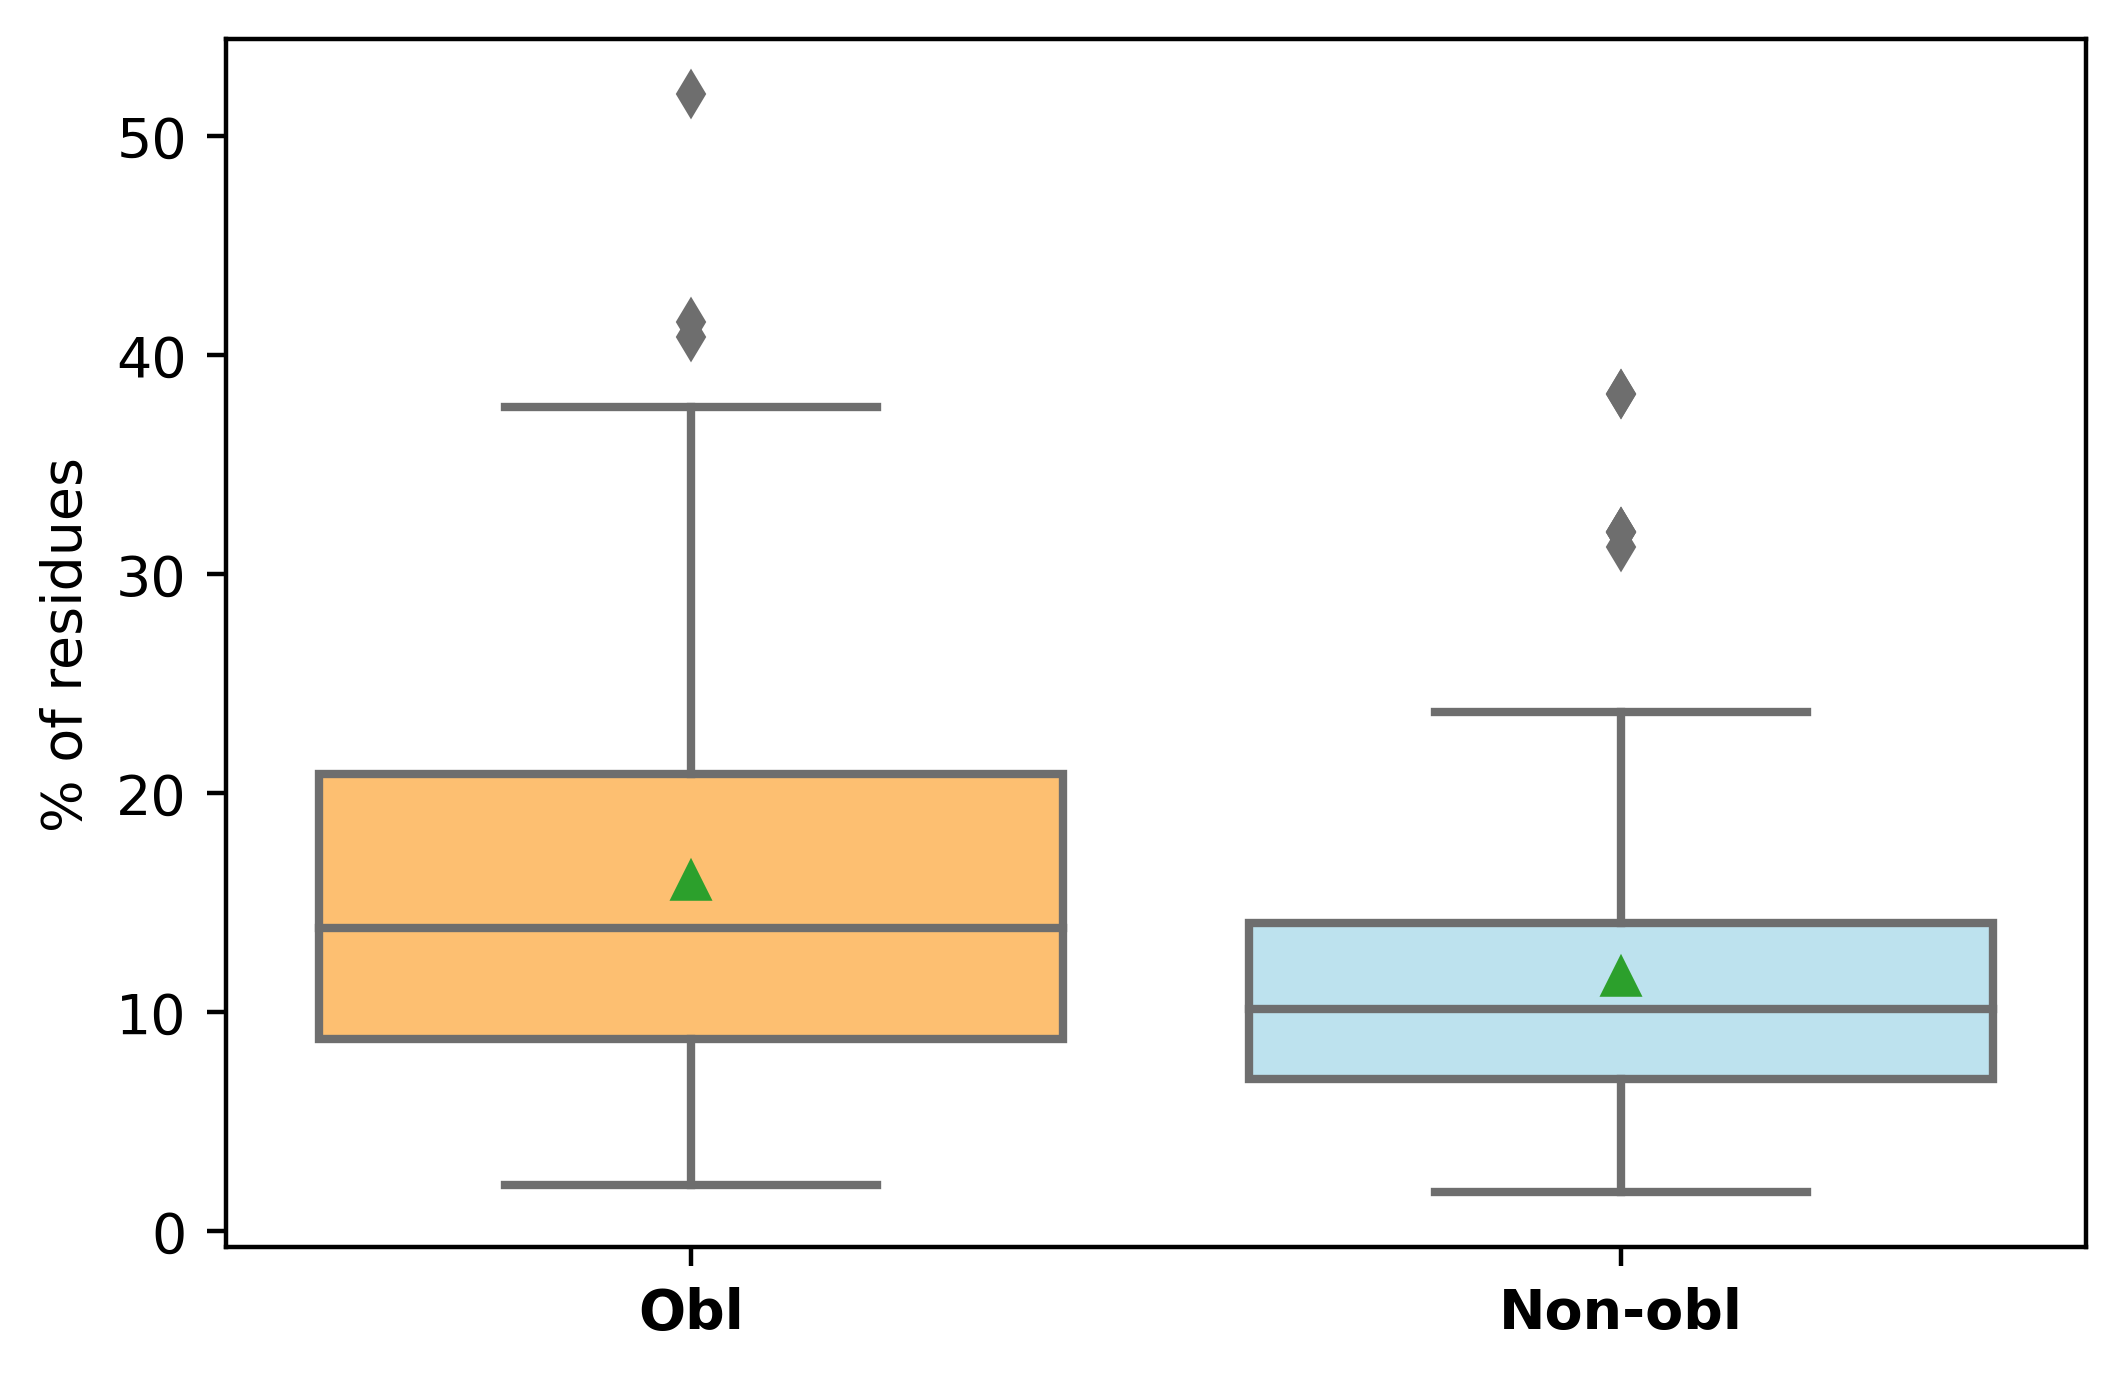

In [12]:
plt.figure(dpi=400)
ax=sns.boxplot(data=data11,showmeans=True,palette="RdYlBu",saturation=50)
xticklabels=['Obl', 'Non-obl']
ax.set_xticklabels(xticklabels,fontweight='bold')
#plt.ylim(0,15)
plt.ylabel('% of residues')
#plt.savefig('random_non_obl/rand_box_0.5.jpg',dpi=300)

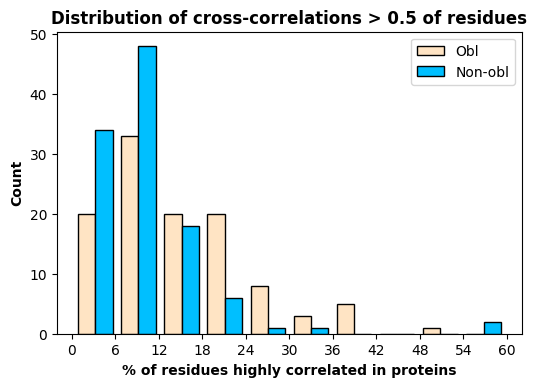

In [246]:
plt.figure(dpi=100)
plt.hist(data11,bins=10,color=('bisque','deepskyblue'),edgecolor='black')
plt.xticks([(x*5.75)+1.5 for x in range(11)],[x*6 for x in range(11)])
#plt.yticks(np.arange(0,60,5))
plt.legend(('Obl','Non-obl'))
plt.xlabel('% of residues highly correlated in proteins',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Distribution of cross-correlations > 0.5 of residues',fontweight='bold')
#plt.ylim(0,25)
#plt.savefig('random_non_obl/rand_distribution_0.5_zoomed.jpg', dpi=300)

In [13]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
print(mannwhitneyu(higher_corr_per_obl,higher_corr_per_non_obl)) #mann-whitney test
print(kstest(higher_corr_per_obl,higher_corr_per_non_obl)) #ks test
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

MannwhitneyuResult(statistic=4362.0, pvalue=0.00017525622300984715)
KstestResult(statistic=0.2818181818181818, pvalue=0.0002970971245721983)
